## Predictions

In [1]:
### autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
### setting up the system path
import sys
sys.path.append('../')

In [18]:
### importing the functions from the src
from src.basic.essential import load_data, get_nan_duplicates_shape, get_info
from src.predictions.split_train_test import split_train_test, verify_split
from src.predictions.preds_and_plot import pred_train_model, best_model_predict, other_model_predict

In [4]:
### importing the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

##### ******************* Tree based models *********************

In [5]:
### setting up the data path
train_tree_path = '../data/model_ready/train_tree.csv'

In [6]:
### loading the data
train_tree = load_data(train_tree_path)
train_tree.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,109100.0,3
1,-120.05,36.96,37.0,1000.0,261.0,1092.0,233.0,1.4267,52300.0,0
2,-122.15,37.74,41.0,856.0,178.0,571.0,191.0,3.1458,130600.0,2
3,-118.27,33.95,35.0,2073.0,494.0,1753.0,490.0,1.5000,93600.0,1
4,-117.01,32.78,20.0,2616.0,597.0,1532.0,579.0,2.9896,235600.0,1


In [7]:
### checking the nan, duplicates and shape
get_nan_duplicates_shape(train_tree)

shape : (15480, 10) 
duplicates : 0 
Nan values : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [8]:
### checking the info
get_info(train_tree)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15480 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   median_house_value  15480 non-null  float64
 9   ocean_proximity     15480 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [9]:
### splitting the data
X_train_tree, X_test_tree, y_train_tree, y_test_tree = split_train_test(train_tree, target_feature = 'median_house_value')

In [10]:
### veryfying the split
verify_split(X_train_tree, y_train_tree, X_test_tree, y_test_tree)

X_train : (11610, 9) :: y_train : (11610,) 
X_test : (3870, 9) :: y_test : (3870,)


r2 score : 0.5948156460629561
MAE : 45823.683204134366
RMSE : 72940.21418895935
MSE : 5320274845.931266


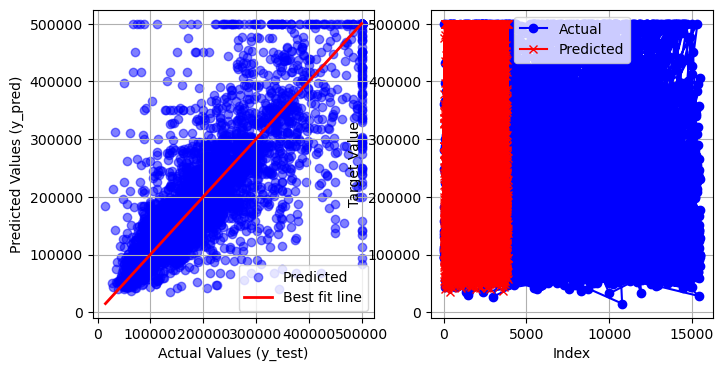

In [11]:
### predictions and training the models, then saving for the inference part
### 1. Decision tree regressor
dtr = DecisionTreeRegressor()
model_path_dtr = '../models/trees/dtr.pkl'
pred_train_model(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = dtr, model_path = model_path_dtr)

r2 score : 0.7965676908631798
MAE : 33306.44890439276
RMSE : 51683.35110940934
MSE : 2671168781.8984838


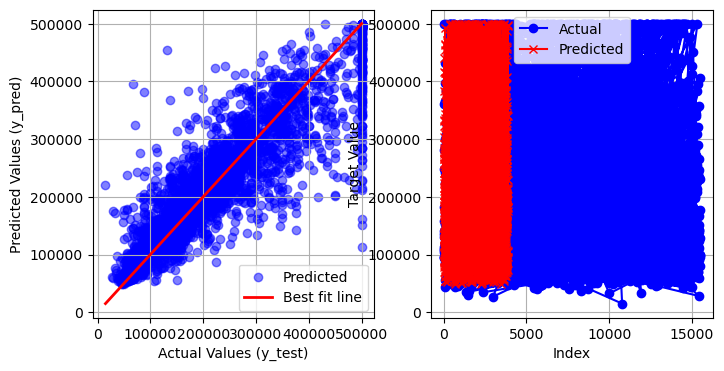

In [12]:
### 2. Random forest regressor
rfr = RandomForestRegressor()
model_path_rfr = '../models/trees/rfr.pkl'
pred_train_model(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = rfr, model_path = model_path_rfr)

r2 score : 0.45863599693617707
MAE : 70221.79824348753
RMSE : 84311.22283321393
MSE : 7108382295.631855


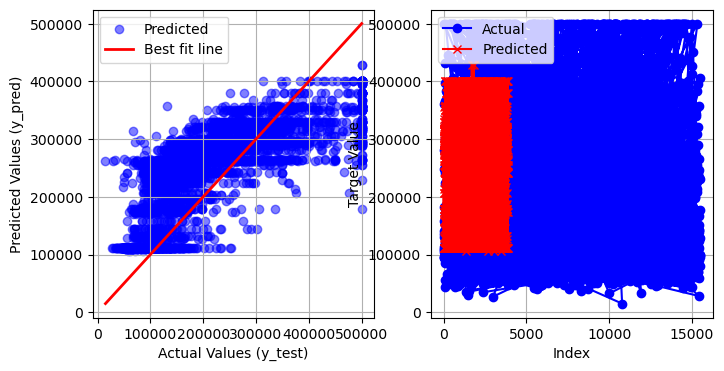

In [13]:
### 3. Adaboost regressor
abr = AdaBoostRegressor()
model_path_abr = '../models/trees/abr.pkl'
pred_train_model(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = abr, model_path = model_path_abr)

r2 score : 0.7592143296595313
MAE : 39283.93374422281
RMSE : 56228.43805997646
MSE : 3161637246.6646094


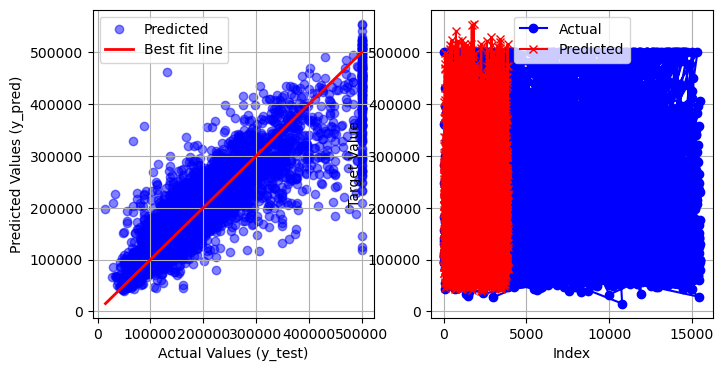

In [33]:
### 4. Gradient boost
gbr = GradientBoostingRegressor()
model_path_gbr = '../models/trees/gbr.pkl'
pred_train_model(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = gbr, model_path = model_path_gbr)

##### ========= best model trees ==========

In [15]:
### setting up the path for the valid_tree
valid_tree_path = '../data/model_ready/valid_tree.csv'

In [16]:
### loading the data
valid_tree = load_data(valid_tree_path)
valid_tree.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,2
1,-119.96,38.93,22.0,2731.0,632.0,1215.0,483.0,2.8300,0
2,-118.80,34.27,12.0,3330.0,600.0,1577.0,584.0,4.6985,1
3,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,1
4,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,1


In [17]:
### veryfying the things
get_nan_duplicates_shape(valid_tree)

shape : (5160, 9) 
duplicates : 0 
Nan values : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


In [19]:
### best model : 'Random forest' predictions on the valid data
y_pred_best_tree = best_model_predict(valid_tree, best_model_path = model_path_rfr)
y_pred_best_tree

array([288357.02, 124645.  , 228442.01, ..., 414863.18, 159407.  ,
        82444.  ])

r2 score : 0.7751115726558361
MAE : 32496.47073643411
RMSE : 48361.66760379253
MSE : 2338850893.4197154


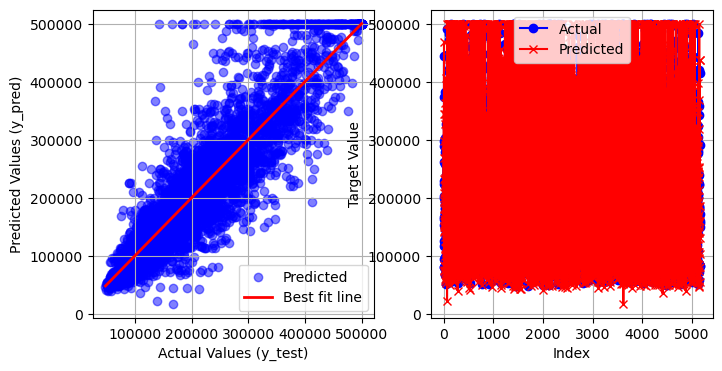

In [ ]:
### 1. Decision tree vs Random forest
other_model_predict(valid_tree, y_pred_best_tree, other_model_path = model_path_dtr)

r2 score : 0.5956642411785129
MAE : 54288.469265798856
RMSE : 64846.83582748019
MSE : 4205112116.836168


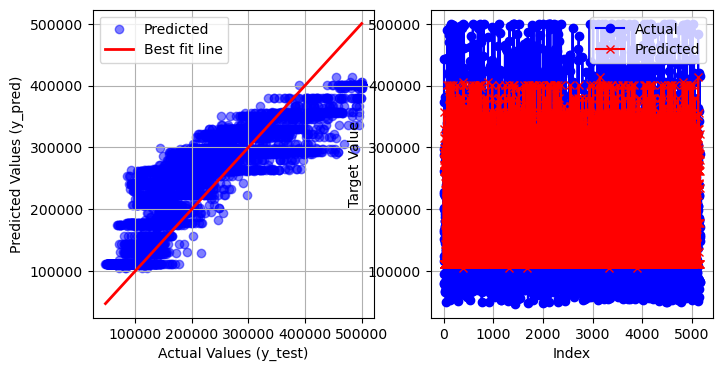

In [21]:
### 2. Adaboost vs Random forest
other_model_predict(valid_tree, y_pred_best_tree, other_model_path = model_path_abr)

r2 score : 0.9292663839918917
MAE : 20239.02422054115
RMSE : 27122.55785537094
MSE : 735633144.6179438


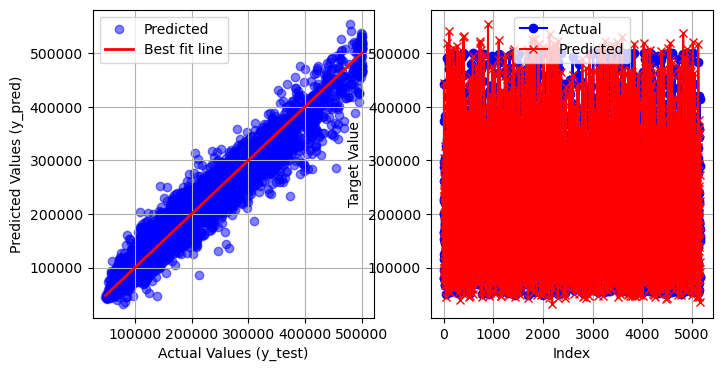

In [22]:
### 3. Gardient boost vs Random forest
other_model_predict(valid_tree, y_pred_best_tree, other_model_path = model_path_gbr)

##### ************ Distance based model ***************

In [23]:
### setting up the data path
train_distance_path = '../data/model_ready/train_distance.csv'

In [24]:
### loading the data
train_distance = load_data(train_distance_path)
train_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.725100,0.018066,0.686275,0.527198,0.514598,0.513536,0.516168,0.389228,0.194022,3
1,0.428287,0.469713,0.705882,0.333513,0.378638,0.478126,0.367566,0.193900,0.076909,0
2,0.219124,0.552604,0.784314,0.303672,0.300832,0.338705,0.327272,0.461373,0.238352,2
3,0.605578,0.149841,0.666667,0.488220,0.524154,0.594903,0.537229,0.209504,0.162063,1
4,0.731076,0.025505,0.372549,0.543169,0.571494,0.560262,0.579815,0.443106,0.454846,1


In [25]:
### performing initial checks
get_nan_duplicates_shape(train_distance)

shape : (15480, 10) 
duplicates : 0 
Nan values : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [26]:
### checking the info
get_info(train_distance)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15480 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   median_house_value  15480 non-null  float64
 9   ocean_proximity     15480 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [27]:
### making the train-test split
X_train_distance, X_test_distance, y_train_distance, y_test_distance = split_train_test(train_distance, target_feature = 'median_house_value')

In [28]:
### veryfying the split
verify_split(X_train_distance, y_train_distance, X_test_distance, y_test_distance)

X_train : (11610, 9) :: y_train : (11610,) 
X_test : (3870, 9) :: y_test : (3870,)


In [29]:
### just cheecking the X_train_distance.head()
X_train_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8180,0.239044,0.507970,0.745098,0.363685,0.322815,0.354873,0.365777,0.602189,1
5079,0.688247,0.142402,0.078431,0.540657,0.443631,0.481726,0.463045,0.743687,0
12782,0.203187,0.570670,0.862745,0.646069,0.660097,0.628836,0.657840,0.558885,2
9515,0.634462,0.124336,0.450980,0.513226,0.508928,0.480037,0.491894,0.589789,1
3938,0.297809,0.651435,0.313725,0.557124,0.606754,0.550040,0.599492,0.360941,0


In [30]:
### Starting out the predictions
### setting up the scaler_path
scaler_price_path = '../scalers/price_scaler.pkl'

r2 score : 0.37625949645515533
MAE : 54890.90496273374
RMSE : 72821.91063144885
MSE : 5303030668.014722


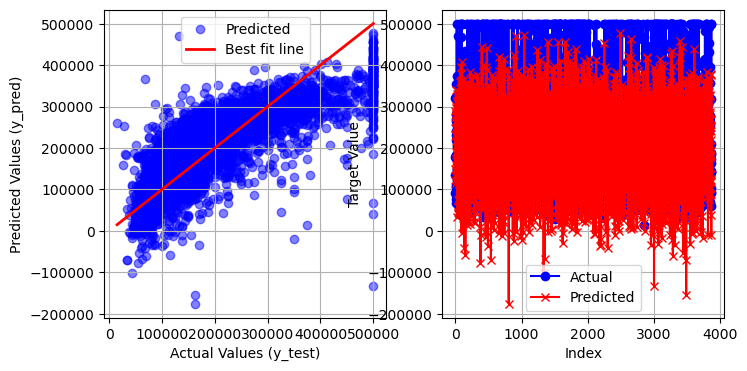

In [32]:
### 1. Linear regression
lr = LinearRegression()
model_path_lr = '../models/distance_based/lr.pkl'
pred_train_model(
    X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = lr, model_path = model_path_lr, scaler_price_path = scaler_price_path
    )

r2 score : 0.6197683801567102
MAE : 41951.00262821988
RMSE : 58982.599673299395
MSE : 3478947064.2206984


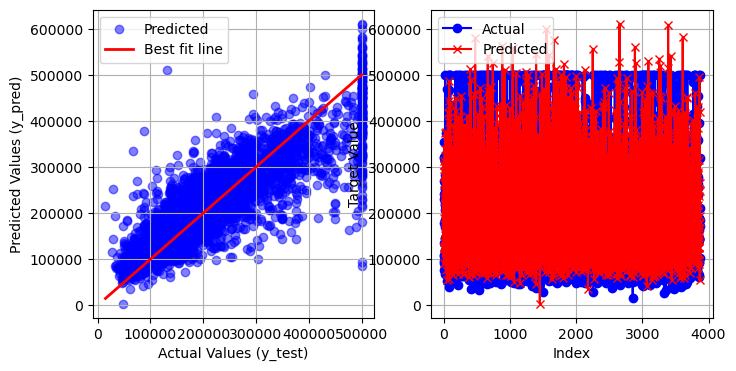

In [34]:
### 2. SVR
svr = SVR()
model_path_svr = '../models/distance_based/svr.pkl'
pred_train_model(
    X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = svr, model_path = model_path_svr, scaler_price_path = scaler_price_path
    )

r2 score : 0.5669165201469323
MAE : 42663.16527131783
RMSE : 63056.55699632711
MSE : 3976129380.2310495


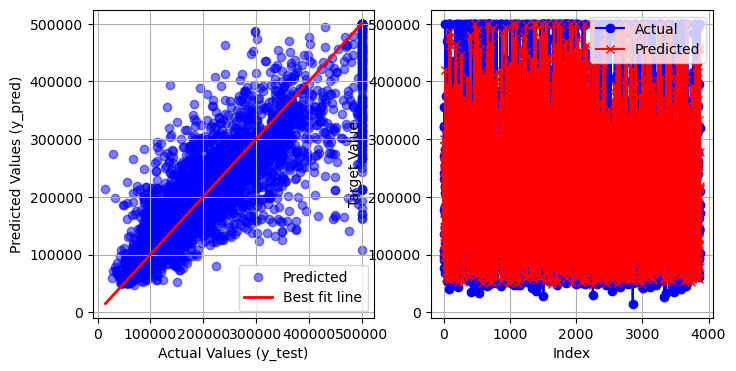

In [35]:
### 3. KNN
knn = KNeighborsRegressor()
model_path_knn = '../models/distance_based/knn.pkl'
pred_train_model(
    X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = knn, model_path = model_path_knn, scaler_price_path = scaler_price_path
    )

##### ========= best model distance ==========

In [36]:
### setting up the data path for the valid
valid_distance_path = '../data/model_ready/valid_distance.csv'

In [38]:
### loading up the data
valid_distance = load_data(valid_distance_path)
valid_distance.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.186335,0.586794,0.36,0.119218,0.128932,0.050542,0.134593,0.382298,2
1,0.439959,0.678381,0.40,0.071621,0.115033,0.033807,0.092557,0.160694,0
2,0.560041,0.182109,0.20,0.087416,0.109181,0.043955,0.112032,0.289555,1
3,0.655280,0.126731,0.64,0.078820,0.122531,0.153281,0.122831,0.160984,1
4,0.663561,0.137380,0.28,0.109066,0.115947,0.043422,0.115889,0.365933,1


In [39]:
### checking up the things
get_nan_duplicates_shape(valid_distance)

shape : (5160, 9) 
duplicates : 0 
Nan values : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


In [40]:
### best model for the distance : SVR
y_pred_best_distance = best_model_predict(valid_distance, best_model_path = model_path_svr, scaler_price_path = scaler_price_path)
y_pred_best_distance

array([[183114.82154441],
       [107288.80362276],
       [211804.41576946],
       ...,
       [183796.08223339],
       [185892.34151364],
       [121534.44189061]])

r2 score : -0.9549839560841173
MAE : 55447.4804366391
RMSE : 69473.05079622901
MSE : 4826504786.935416


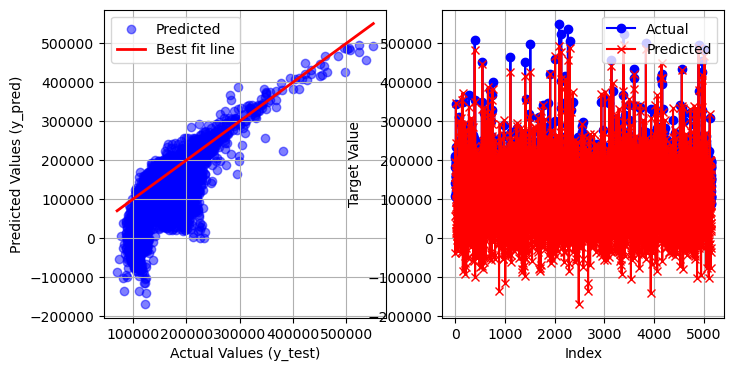

In [41]:
### 1. LR vs SVR
other_model_predict(valid_distance, y_pred_best_distance, other_model_path = model_path_lr, scaler_price_path = scaler_price_path)

r2 score : 0.19943598202009438
MAE : 33974.90758352781
RMSE : 44457.271506185956
MSE : 1976448989.7747335


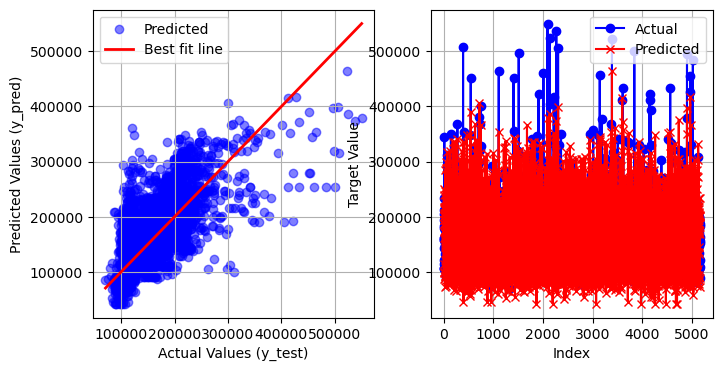

In [42]:
### 2. KNN vs SVR
other_model_predict(valid_distance, y_pred_best_distance, other_model_path = model_path_knn, scaler_price_path = scaler_price_path)